In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report



In [2]:
df=pd.read_csv(r"C:\Users\sneha B\Downloads\Laptop-Users.csv")
df

,Age,Gender,Region,Occupation,Income,Has Laptop
0,14,male,city,student,10000,no
1,34,female,city,teacher,22000,no
2,42,male,countryside,banker,24000,yes
3,30,male,countryside,teacher,25000,no
4,16,male,city,student,6000,no
5,33,female,city,banker,20000,yes
6,26,female,city,student,8000,yes
7,22,male,city,student,4000,yes
8,28,female,countryside,teacher,12000,no
9,27,female,city,student,7000,yes


In [3]:
x = df.iloc[:,:-1]
x

,Age,Gender,Region,Occupation,Income
0,14,male,city,student,10000
1,34,female,city,teacher,22000
2,42,male,countryside,banker,24000
3,30,male,countryside,teacher,25000
4,16,male,city,student,6000
5,33,female,city,banker,20000
6,26,female,city,student,8000
7,22,male,city,student,4000
8,28,female,countryside,teacher,12000
9,27,female,city,student,7000


In [4]:
y = df.iloc[:,5]
y

0      no
1      no
2     yes
3      no
4      no
5     yes
6     yes
7     yes
8      no
9     yes
10     no
11    yes
12    yes
13     no
14    yes
15    yes
16    yes
17    yes
18     no
19     no
Name: Has Laptop, dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label = LabelEncoder()

In [7]:
x = x.apply(LabelEncoder().fit_transform)
x

,Age,Gender,Region,Occupation,Income
0,0,1,0,2,5
1,11,0,0,3,11
2,14,1,1,0,12
3,9,1,1,3,13
4,2,1,0,2,2
5,10,0,0,0,10
6,5,0,0,2,4
7,4,1,0,2,1
8,7,0,1,3,7
9,6,0,0,2,3


In [8]:
    x_train, x_test, y_train, y_test = train_test_split( 
    x, y, test_size = 0.20, random_state = 10)
      
   

In [9]:
# Function to perform training with entropy.
def train_using_entropy(x_train, x_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 10,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(x_train, y_train)
    return clf_entropy
  

In [10]:
# Function to perform training with giniIndex.
def train_using_gini(x_train, x_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 10,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(x_train, y_train)
    return clf_gini

In [11]:
# Function to make predictions
def prediction(x_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(x_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [12]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred): # here ytest - actual output,ypred - predicted output
      
    print("Confusion Matrix:\n\n----------------\n ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy score: \n-----------------\n",
    accuracy_score(y_test,y_pred)*100)
      
    print("f1 score Report : \n-------------------\n",
    classification_report(y_test, y_pred))

In [13]:
# Driver code
def main():
      
   
    clf_gini = train_using_gini(x_train, x_test, y_train)
    
    clf_entropy = train_using_entropy(x_train, x_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(x_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(x_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
['no' 'no' 'yes' 'yes']
Confusion Matrix:

----------------
  [[1 0]
 [1 2]]
Accuracy score: 
-----------------
 75.0
f1 score Report : 
-------------------
               precision    recall  f1-score   support

          no       0.50      1.00      0.67         1
         yes       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Results Using Entropy:
Predicted values:
['no' 'no' 'yes' 'yes']
Confusion Matrix:

----------------
  [[1 0]
 [1 2]]
Accuracy score: 
-----------------
 75.0
f1 score Report : 
-------------------
               precision    recall  f1-score   support

          no       0.50      1.00      0.67         1
         yes       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4


In [14]:
import matplotlib.pyplot as plt
import seaborn as sb

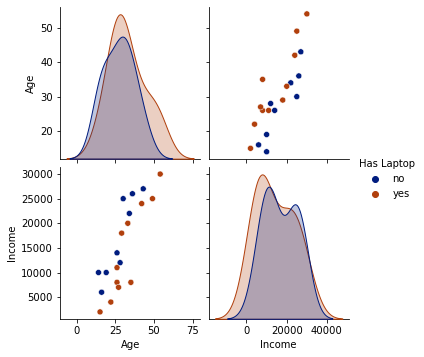

In [15]:
sb.pairplot(df, hue="Has Laptop", palette="dark")